# Part 3 -- Experiment

## Importing the libraries…

importing Jupyter notebook from preprocessing.ipynb
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


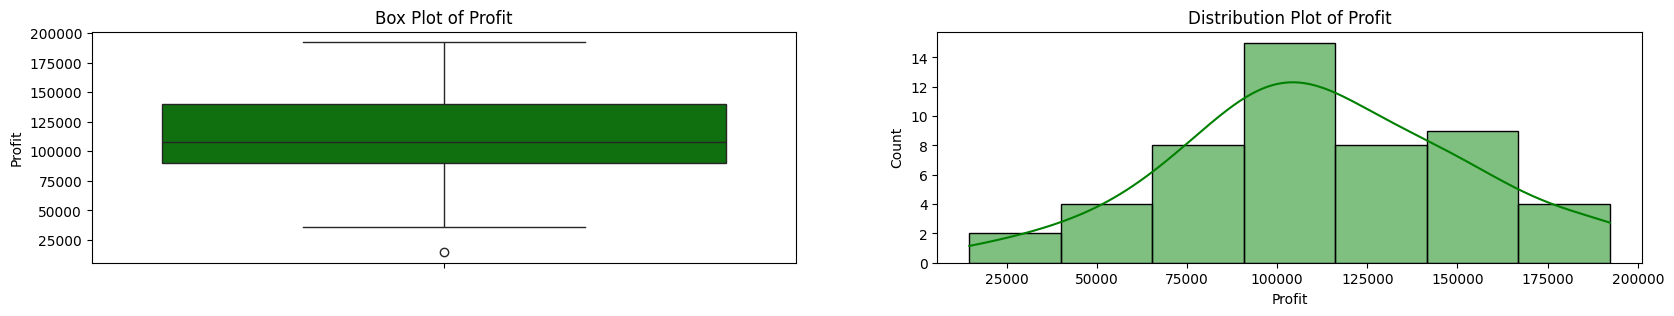

importing Jupyter notebook from EDA.ipynb


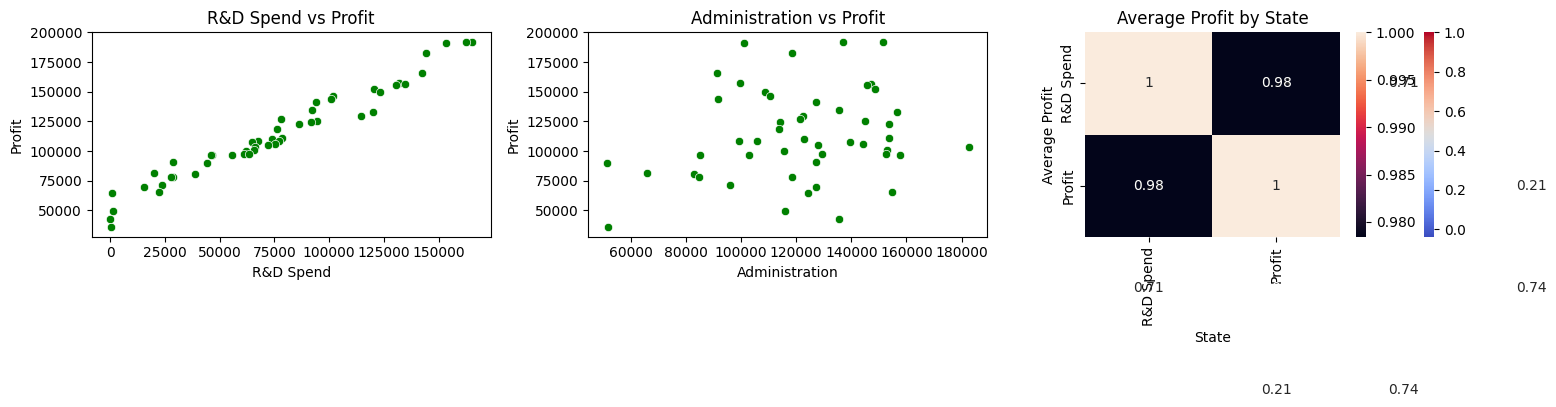

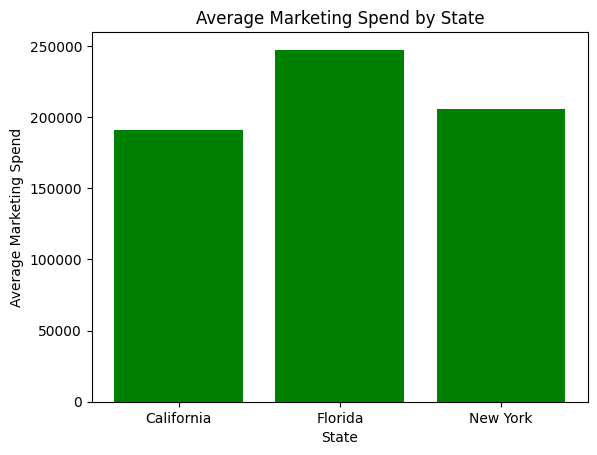

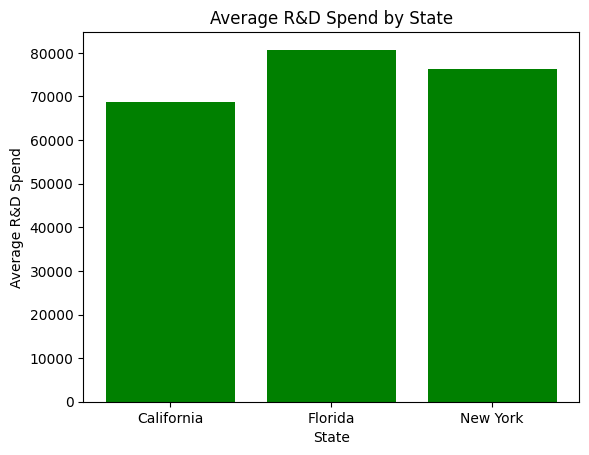

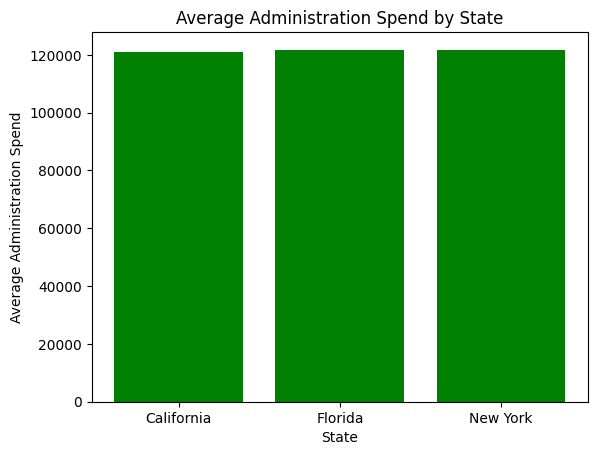

In [1]:
import import_ipynb
import preprocessing 
import EDA
from preprocessing import startups_df, startups_df2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


## Define Independent and Dependent Variables

In [2]:
#Now we will define our Dependent variable and Independent variable

X = startups_df2.iloc[:,[0,2,3]].values
y = startups_df2.iloc[:,1].values

print(f"Shape of Dependent Variable X = {X.shape}")
print(f"Shape of Independent Variable y = {y.shape}")

Shape of Dependent Variable X = (49, 3)
Shape of Independent Variable y = (49,)


## Split Data into Training and Testing Sets for ML model

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 101)
print(f"Shape of X_train = {X_train.shape}")
print(f"Shape of X_test = {X_test.shape}")
print(f"Shape of y_train = {y_train.shape}")
print(f"Shape of y_test = {y_test.shape}")

Shape of X_train = (39, 3)
Shape of X_test = (10, 3)
Shape of y_train = (39,)
Shape of y_test = (10,)


## Training the Linear Regression Model using the Training Data

In [4]:
#Now we will build a Linear regression model on the Training Set and Test it on our Test Set

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [5]:
# To test the accuracy of the model on our Test Data
#The value below shows that our model is performing well in making predictions on the test dataset
model.score(X_train,y_train)

0.9627751272930376

## Model Evaluation

In [23]:
# Making predictions with the test set
y_pred = model.predict(X_test)
# Evaluating model performance
mse = mean_squared_error(y_test, y_pred)
r2= metrics.r2_score(y_test, y_pred)
N,p = X_test.shape
adj_r2 = 1-((1-r2)*(N-1))/(N-p-1)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f'Adjusted R^2 = {adj_r2}')


Mean Squared Error: 106491980.85918851
R-squared: 0.9242380072120073
Adjusted R^2 = 0.886357010818011


## Hyperparameter Tuning
#### Hyperparameter tuning will help to improve the performance of our model by optimizing its hyperparameters for better accuracy.

In [16]:
# Hyperparameter tuning using grid search
param_grid = {'fit_intercept': [True, False]}
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameter for our model is:", grid_search.best_params_)
print("Best score for the model is:", grid_search.best_score_)

Best Parameter for our model is: {'fit_intercept': True}
Best score for the model is: 0.9480109545008595


## Cross validation

In [15]:
#Cross-validation to evaluate the performance of our machine learning model
accuracy_scores = cross_val_score(model,X_train,y_train,cv=5)

print(f"Accuracies obtained from 5-cross validation = {accuracy_scores}")
print(f'Mean of all accuracies = {accuracy_scores.mean()}')
print(f"Standard Deviation of accuracies = {accuracy_scores.std()}")

Accuracies obtained from 5-cross validation = [0.92253207 0.91428495 0.96311516 0.97224433 0.96787827]
Mean of all accuracies = 0.9480109545008519
Standard Deviation of accuracies = 0.02448150764411356


In [14]:
#Now we can see how model performs on test dataset
y_pred = model.predict(X_test)
data = {'y_test':y_test,'y_pred': y_pred.round(2)}
pd.DataFrame(data=data)

,y_test,y_pred
0,90708.19,73382.98
1,110352.25,112267.38
2,118474.03,114900.98
3,81229.06,63833.66
4,124266.90,127497.13
5,191792.06,188966.03
6,64926.08,47338.87
7,111313.02,113722.74
8,126992.93,116410.05
9,49490.75,49923.83


## Model Interpretation

In [10]:
# Accessing model coefficients to understand the influence of different features on the target variable.
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficients: [ 8.57791994e-01 -6.95589939e+02 -3.01014651e+03]
Intercept: 49491.02605460255


## Residual Plot

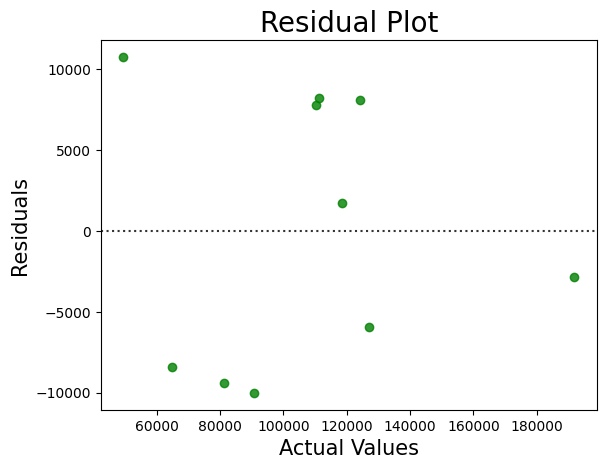

In [11]:
plt.title('Residual Plot', size=20)
sns.residplot(x=y_test, y=y_pred, color='green')  # Use x and y as keyword arguments
plt.xlabel('Actual Values', size=15)
plt.ylabel('Residuals', size=15)
plt.show()

#we can not see any pattern in the plot, so our model is good

Text(0, 0.5, 'y_pred')

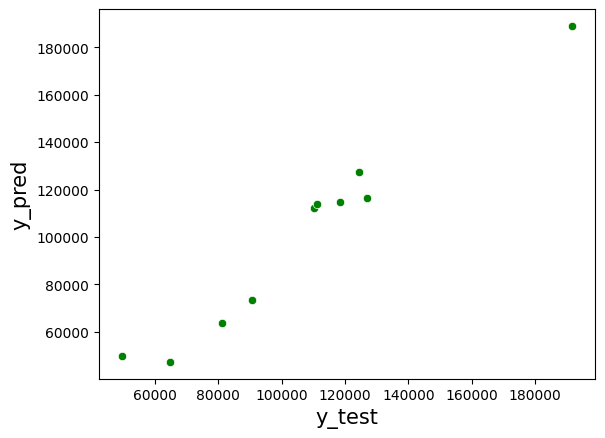

In [12]:
sns.scatterplot(x=y_test, y=y_pred, color='green')
plt.xlabel('y_test',size=15)
plt.ylabel('y_pred',size=15)

## Profit Calculator

In [20]:
def predict_profit(rd_spent,state):
    s1=s2=0
    if state == 'Florida':
        s1=1
    elif state == 'New York':
        s2=1
    
    X = np.array([rd_spent,s1,s2]).reshape(1,3)
    return float(model.predict(X))

In [24]:
rd_spent = float(input('Enter the R&D Spent: '))
state = input('Enter the state in which you operate: ')
print(f'\nExpected Profit will be {round(predict_profit(rd_spent,state),2)}')

Enter the R&D Spent:  12
Enter the state in which you operate:  lagos



Expected Profit will be 49501.32


## Conclussion